In [1]:
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
p = Path("./Images/")
print(p)
print(type(p))

Images
<class 'pathlib.WindowsPath'>


#### .glob("--Regular Expression--") : To look all the files in this path
#### " * " is used for all kinds of files
#### __Note__ : Once iterated, we need to start from the very beginning as it is
####  a generator function

In [3]:
dirs = p.glob("*")
print(type(dirs))

<class 'generator'>


In [4]:
for folder_name in dirs:
    print(folder_name)

Images\cats
Images\dogs
Images\horses
Images\humans


In [5]:
# to generate a label, we will extract the label from the folder name
# as ' / ' is a special character, we need to use ' // ' this.
dirs = p.glob("*")
for folder_name in dirs:
    label = str(folder_name).split('\\')[-1][:-1]
    print(label)

cat
dog
horse
human


In [6]:
# Now to iterate inside every folder
dirs = p.glob("*")
for folder_name in dirs:
    # We are getting the path of every image
    for img_path in folder_name.glob("*"):
        print(img_path)

Images\cats\cat.1.jpg
Images\cats\cat.10.jpg
Images\cats\cat.100.jpg
Images\cats\cat.101.jpg
Images\cats\cat.102.jpg
Images\cats\cat.103.jpg
Images\cats\cat.104.jpg
Images\cats\cat.105.jpg
Images\cats\cat.106.jpg
Images\cats\cat.107.jpg
Images\cats\cat.108.jpg
Images\cats\cat.109.jpg
Images\cats\cat.11.jpg
Images\cats\cat.110.jpg
Images\cats\cat.111.jpg
Images\cats\cat.112.jpg
Images\cats\cat.113.jpg
Images\cats\cat.114.jpg
Images\cats\cat.115.jpg
Images\cats\cat.116.jpg
Images\cats\cat.117.jpg
Images\cats\cat.118.jpg
Images\cats\cat.119.jpg
Images\cats\cat.12.jpg
Images\cats\cat.120.jpg
Images\cats\cat.121.jpg
Images\cats\cat.122.jpg
Images\cats\cat.123.jpg
Images\cats\cat.124.jpg
Images\cats\cat.125.jpg
Images\cats\cat.126.jpg
Images\cats\cat.127.jpg
Images\cats\cat.128.jpg
Images\cats\cat.129.jpg
Images\cats\cat.13.jpg
Images\cats\cat.130.jpg
Images\cats\cat.131.jpg
Images\cats\cat.132.jpg
Images\cats\cat.133.jpg
Images\cats\cat.134.jpg
Images\cats\cat.135.jpg
Images\cats\cat.136.jp

Images\humans\rider-1.jpg
Images\humans\rider-10.jpg
Images\humans\rider-100.jpg
Images\humans\rider-101.jpg
Images\humans\rider-102.jpg
Images\humans\rider-103.jpg
Images\humans\rider-104.jpg
Images\humans\rider-105.jpg
Images\humans\rider-106.jpg
Images\humans\rider-107.jpg
Images\humans\rider-108.jpg
Images\humans\rider-109.jpg
Images\humans\rider-11.jpg
Images\humans\rider-110.jpg
Images\humans\rider-111.jpg
Images\humans\rider-112.jpg
Images\humans\rider-113.jpg
Images\humans\rider-114.jpg
Images\humans\rider-115.jpg
Images\humans\rider-116.jpg
Images\humans\rider-117.jpg
Images\humans\rider-118.jpg
Images\humans\rider-119.jpg
Images\humans\rider-12.jpg
Images\humans\rider-120.jpg
Images\humans\rider-121.jpg
Images\humans\rider-122.jpg
Images\humans\rider-123.jpg
Images\humans\rider-124.jpg
Images\humans\rider-125.jpg
Images\humans\rider-126.jpg
Images\humans\rider-127.jpg
Images\humans\rider-128.jpg
Images\humans\rider-129.jpg
Images\humans\rider-13.jpg
Images\humans\rider-130.jp

# Reading Images Using __KERAS__

In [7]:
from keras.preprocessing import image

In [8]:
dirs = p.glob("*")

# Mapping for each class
labels_dic = {
    'cat' : 0,
    'dog' : 1,
    'horse' : 2,
    'human' : 3
}

# Images and their corresponding labels
# ( m X 100 X 100 X 3)
img_data = []
labels = []

for folder_name in dirs:
    
    label = str(folder_name).split('\\')[-1][:-1]
    
    # We are getting the path of every image
    for img_path in folder_name.glob("*.jpg"):
        # loading the image
        img = image.load_img(img_path, target_size=(100,100))
        
        # Image -> Array
        # Each image : ( 100 X 100 X 3)
        img_array = image.img_to_array(img)
        
        img_data.append(img_array)
        
        labels.append(labels_dic[label])
        
        

In [9]:
print(len(img_data))
print(len(labels))

808
808


## Converting the __data__ into __numpy array__

In [10]:
img_data = np.array(img_data,dtype='float32')/255.0
labels = np.array(labels)

# Shape : (m X 100 X 100 X 3)
print(img_data.shape , labels.shape)

(808, 100, 100, 3) (808,)


## Visualisation of Data

In [11]:
import matplotlib.pyplot as plt

In [12]:
def drawImg(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

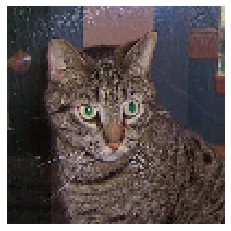

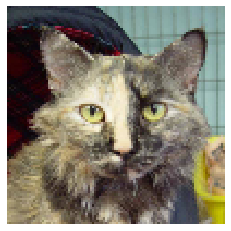

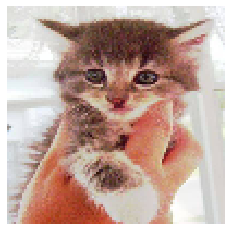

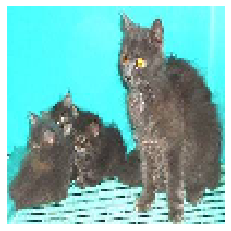

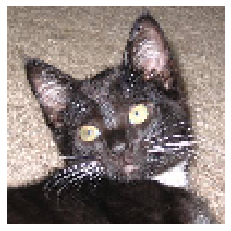

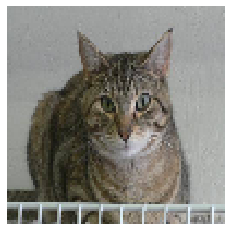

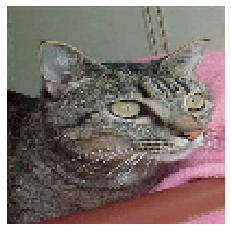

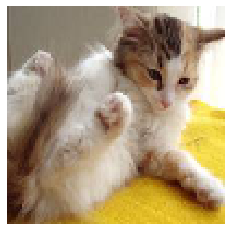

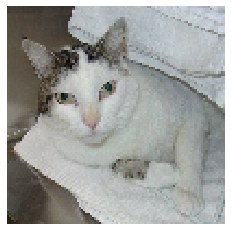

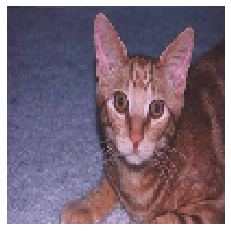

In [13]:
for i in range(10):
    drawImg(img_data[i])

# Shuffle this data : A Good Practice
- ml algo's should be trained with different variation in data

In [14]:
import random

In [15]:
# we should shuffle according to both images as well as labels otherwise they 
# both may get differently shuffled
combined = list(zip(img_data,labels))

random.shuffle(combined)

# Unzip them
# ' * ' is used to unzip
img_data[:] , labels[:] = zip(*combined) 

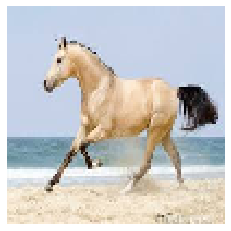

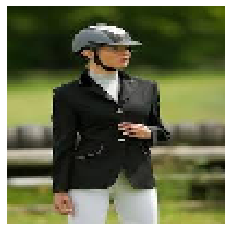

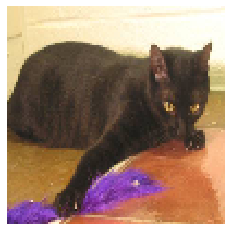

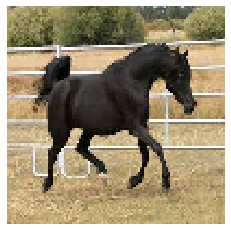

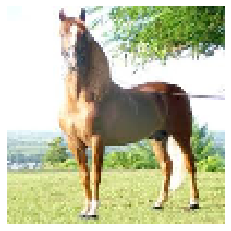

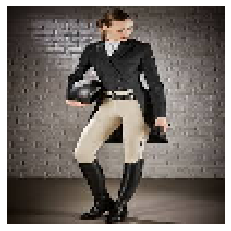

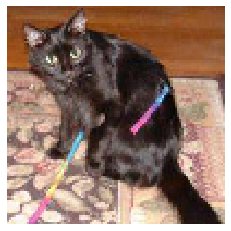

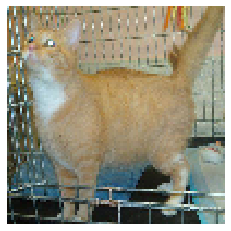

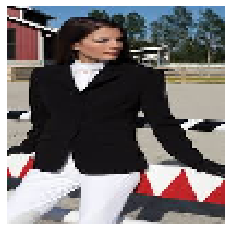

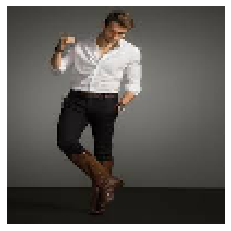

In [16]:
for i in range(10):
    drawImg(img_data[i])

# Data Processing for One-Vs-One Classification

### Step 1 : Grouping of data according to their class

In [17]:
print(img_data.shape)
print(labels.shape)

(808, 100, 100, 3)
(808,)


In [18]:
# Flattening the image
M = img_data.shape[0]
img_data = img_data.reshape(M,-1)

print(img_data.shape)
print(labels.shape)

(808, 30000)
(808,)


## But every example has 30,000 features !!
## Thus, we will reduce its dimensions

In [19]:
dirs = p.glob("*")

# Mapping for each class
labels_dic = {
    'cat' : 0,
    'dog' : 1,
    'horse' : 2,
    'human' : 3
}

# Images and their corresponding labels
# ( m X 100 X 100 X 3)
img_data = []
labels = []

for folder_name in dirs:
    
    label = str(folder_name).split('\\')[-1][:-1]
    
    # We are getting the path of every image
    for img_path in folder_name.glob("*.jpg"):
        # loading the image
        img = image.load_img(img_path, target_size=(32,32))
        
        # Image -> Array
        # Each image : ( 32 X 32 X 3)
        img_array = image.img_to_array(img)
        
        img_data.append(img_array)
        
        labels.append(labels_dic[label])
        
        

In [20]:
img_data = np.array(img_data,dtype='float32')/255.0
labels = np.array(labels)

# Shape : (m X 32 X 32 X 3)
print(img_data.shape , labels.shape)

(808, 32, 32, 3) (808,)


In [21]:
# we should shuffle according to both images as well as labels otherwise they 
# both may get differently shuffled
combined = list(zip(img_data,labels))

random.shuffle(combined)

# Unzip them
# ' * ' is used to unzip
img_data[:] , labels[:] = zip(*combined)

In [22]:
# Flattening the image
M = img_data.shape[0]
img_data = img_data.reshape(M,-1)

print(img_data.shape)
print(labels.shape)

(808, 3072)
(808,)


## This size is reasonably good !

### Step 2 : Create a dictionary which stores image data according to their labels

In [23]:
def classWiseData(x,y):
    
    # Storing the data in the form of dict, i.e
    # class : list of numpy array of images
    data = {}
    
    # unique classes
    CLASSES = len(np.unique(y))
    
    # defining labels in the dict
    for i in range(CLASSES):
        data[i] = []
        
    # total number of images
    M = x.shape[0]
    
    for i in range(M):
        
        # appending each image to their corresponding label
        data[y[i]].append(x[i])
        
    # converting the image data into numpy array
    for k in data.keys():
        data[k] = np.array(data[k])
    
    return data

In [24]:
data = classWiseData(img_data,labels)

In [25]:
print("Cats: ",data[0].shape)
print("Dogs: ",data[1].shape)
print("Horse: ",data[2].shape)
print("Humans: ",data[3].shape)

Cats:  (202, 3072)
Dogs:  (202, 3072)
Horse:  (202, 3072)
Humans:  (202, 3072)


### Step 3 : Process the data for SVM
- as SVM accepts classes as (-1,1)

In [26]:
def getDataPairForSVM(d1,d2):
    
    """ Combines Data of 2 classes into a single matrix. """
    # given 2 kinds of data (without labels) as we have to designate the labels
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1 + l2
    
    features = d1.shape[1]
    
    # X and Y for SVM
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels
    

# SVM Classifier

In [27]:
class SVM:
    
    # C - penalty
    def __init__(self,c=1.0):
        self.c = c
        self.b = 0
        self.W = 0
        
    # Hinge_Loss / Loss Function
    # loss = 0.5*W.T*W + c*Sigma( max ( 0 , 1- ti) )
    def hinge_loss(self,X,Y,W,b):
        loss = 0.0
        
        loss += 0.5*np.dot(W,W.T)
        
        m = X.shape[0]
        # the sigma term
        for i in range(m):
            
            ti = Y[i]*(np.dot(W,X[i].T) + b)
            
            loss += self.c*(max(0 , 1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,max_Itr=300):
        
        m,n = X.shape
        
        # Init the model parameters ( W and bias )
        W = np.zeros((1,n))
        b = 0
        
        # Training the model
        losses = []
        
        for i in range(max_Itr):
            
            l = self.hinge_loss(X,Y,W,b)
            losses.append(l)
            
            # Batch Gradient Descent + Random Shuffling :: included in PEGASOS
            ids = np.arange(m)
            np.random.shuffle(ids)
            
            for batch_start in (0,m,batch_size):
                
                # Assuming 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                # Iterating over all samples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    
                    if j < m:
                        idx = ids[j]
                        
                        ti = Y[idx]*(np.dot(W,X[idx].T) + b)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += -1.0*self.c*Y[idx]*X[idx]
                            gradb += -1.0*self.c*Y[idx]
                            
                # The mini batch to be added
                # Gradient Descent
                W  = W - learning_rate*W - learning_rate*gradw
                b  = b - learning_rate*gradb
                
        
        self.W = W
        self.b = b
        
        return self.W,self.b,losses

# Creating NC2 SVM Classifiers
-- We will just learn the model weights and store them

In [28]:
mySVM = SVM()
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [29]:
data[1].shape

(202, 3072)

In [72]:
def trainSVM(data,learning_rate=0.001,max_Itr=300,batch_size=100):
    
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        
        for j in range(i+1,CLASSES):
            
            # Data processing for svm training
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            
            # Parameters and Training
            W,b,loss = mySVM.fit(xpair,ypair,learning_rate=learning_rate, max_Itr=max_Itr, batch_size=batch_size)
            
            # Storing the parameters
            svm_classifiers[i][j] = (W,b)
            
            # Plotting the loss
            plt.plot(loss)
            plt.show()
            
    return svm_classifiers

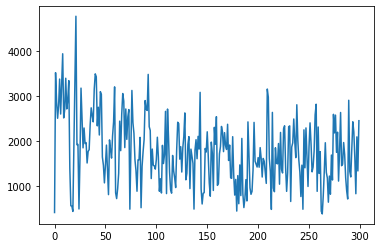

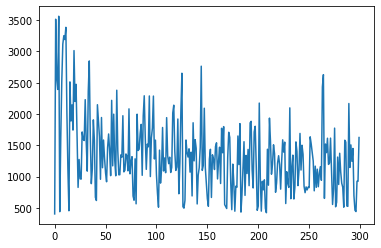

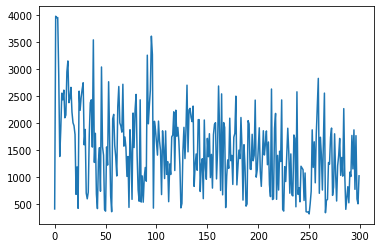

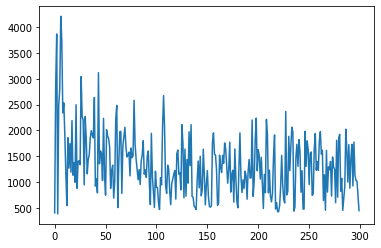

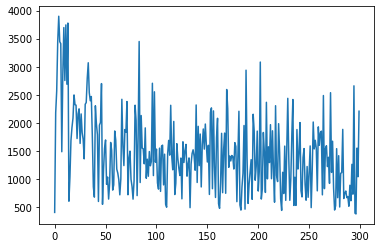

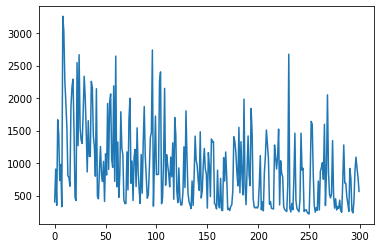

In [31]:
svm_classifiers = trainSVM(data)

In [32]:
# 0:Cats , 1:Dogs
# These are the parameters of the cats and dogs decision boundary
cats_dogs = svm_classifiers[0][1]

In [33]:
print(cats_dogs[0].shape)
print(cats_dogs[1])

(1, 3072)
-0.18300000000000025


# Prediction

In [34]:
def BinaryPredict(x,W,b):
    
    z = np.dot(x,W.T) + b
    
    if z >= 0:
        return 1
    else:
        return -1
    

In [35]:
def predict(x):
    
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        
        for j in range(i+1,CLASSES):
            
            W,b = svm_classifiers[i][j]
            
            # Prediction by svm  for 2 classes (Binary)
            z = BinaryPredict(x,W,b)
            if z == 1:
                count[j] += 1
                
            else:
                count[i] += 1
                
    # We will return the majority prediction
    final_prediction = np.argmax(count)
    
    return final_prediction

In [36]:
print(predict(img_data[5]))
print(labels[5])

1
1


In [37]:
def accuracy(x,y):
    
    count = 0
    
    for i in range(x.shape[0]):
        pred = predict(x[i])
        
        if(pred == y[i]):
            count += 1
            
    return count/x.shape[0]

In [38]:
accuracy(img_data,labels)

0.33663366336633666

## Improving Accuracy !!

In [39]:
# Lets train the model with 2 classes and find the optimal values for which loss converges !!
svm_cd = SVM()
xp,yp = getDataPairForSVM(data[0],data[1])
W,b,loss = svm_cd.fit(xp,yp)

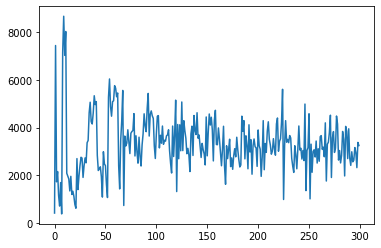

In [40]:
plt.plot(loss)

## The learning rate is too high

In [70]:
svm_cd = SVM()
xp,yp = getDataPairForSVM(data[0],data[1])
W,b,loss = svm_cd.fit(xp,yp,learning_rate=0.00001,max_Itr=5000,batch_size=100)

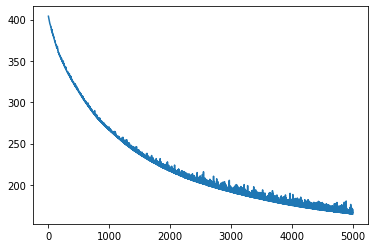

In [71]:
plt.plot(loss)

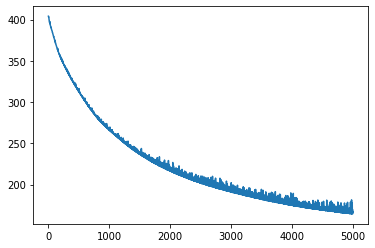

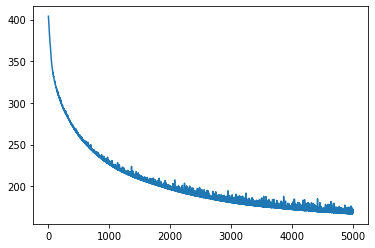

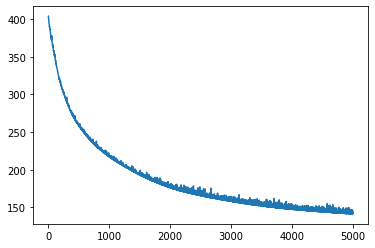

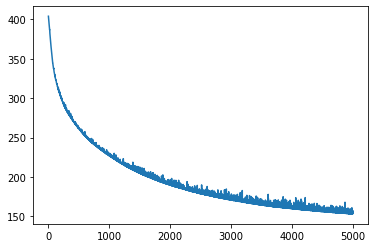

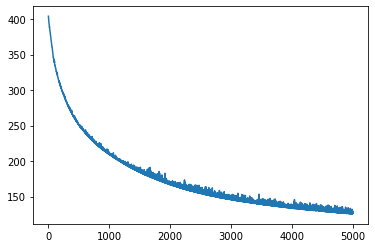

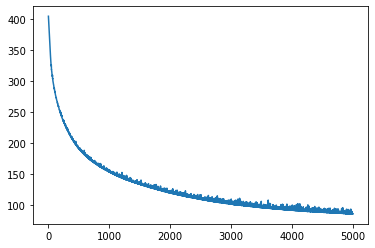

In [73]:
svm_classifiers = trainSVM(data,learning_rate=0.00001, max_Itr=5000)

In [74]:
accuracy(img_data,labels)

0.6212871287128713

In [75]:
from sklearn import svm

In [76]:
svc = svm.SVC(kernel='linear',C=1.0)

In [77]:
svc.fit(img_data,labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
svc.score(img_data,labels)

0.6336633663366337